# FACE RECOGNITION

In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img1=cv2.imread('DATA/Denis_Mukwege.jpg')
img2=cv2.imread('bairav.jpg')
img3=cv2.imread('DATA/Nadia_Murad.jpg',0)

In [12]:
img1_c=img1.copy()

In [45]:
cascade=cv2.CascadeClassifier('DATA/haarcascades/haarcascade_frontalface_default.xml')

In [20]:
face1=cascade.detectMultiScale(img1_c)

In [46]:
def face(img):
    
    img_copy=img.copy()
    
    rect = cascade.detectMultiScale(img_copy)
    
    for (x,y,w,h) in rect:
        cv2.rectangle(img_copy,(x,y),(x+w,y+h),[255,0,0],5)
    
    return img_copy

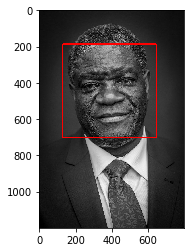

In [29]:
plt.imshow(face(img1))

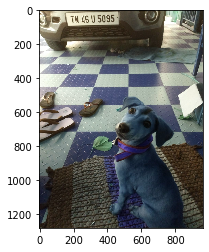

In [30]:
plt.imshow(face(img2))

In [39]:
e_cascade=cv2.CascadeClassifier('DATA/haarcascades/haarcascade_eye.xml')

In [40]:
def eyes(img):
    img_cop=img.copy()
    
    rect=e_cascade.detectMultiScale(img)
    
    for (x,y,w,h) in rect:
        cv2.rectangle(img_cop,(x,y),(x+w,y+h),[255,255,255],5)
    return img_cop    

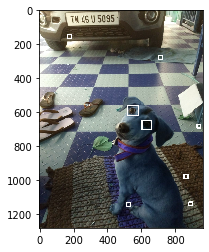

In [38]:
plt.imshow(eyes(img2))

TypeError: unsupported operand type(s) for +: 'AxesImage' and 'AxesImage'

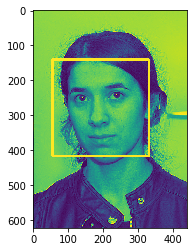

In [54]:
plt.imshow(eyes(img3))
plt.imshow(face(img3))

In [43]:
cap = cv2.VideoCapture(0)

while True:
    
    ret,frame=cap.read(0)
    
    frame=face(frame)
    
    cv2.imshow('face detection',frame)
    
    if cv2.waitKey(1) & 0xFF==27:
        break
        
cap.release()
cv2.destroyAllWindows()

In [47]:
cap = cv2.VideoCapture(0) 

while True: 
    
    ret, frame = cap.read(0) 
     
    frame = face(frame)
    
 
    cv2.imshow('Video Face Detection', frame) 
 
    c = cv2.waitKey(1) 
    if c == 27: 
        break 
        
cap.release() 
cv2.destroyAllWindows()

In [55]:
# combining face and eyes in a image

In [4]:
# cascading

e_cascade=cv2.CascadeClassifier('DATA/haarcascades/haarcascade_eye.xml')
f_cascade=cv2.CascadeClassifier('DATA/haarcascades/haarcascade_frontalface_default.xml')

In [5]:
def face_eye(image):
    img=image.copy()
    eye=e_cascade.detectMultiScale(img)
    face=f_cascade.detectMultiScale(img)
    for (x,y,w,h) in eye:
        cv2.rectangle(img,(x,y),(x+w,y+h),[0,0,255],5)
    for (x,y,w,h) in face:
        cv2.rectangle(img,(x,y),(x+w,y+h),[0,0,255],5)
    return img    

In [6]:
cap=cv2.VideoCapture(0)

while True:
    ret, frame = cap.read(0)
    
    frame = face_eye(frame)
    
    cv2.imshow('face_eye detection',frame)
    
    if cv2.waitKey(1) & 0xFF==27:
        break
cap.release()        
cv2.destroyAllWindows()

In [6]:
road=cv2.imread('road_image.jpg')
road_copy=road.copy()

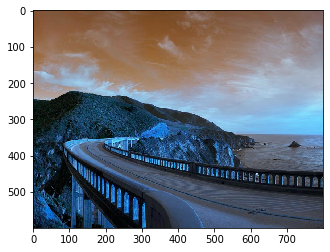

In [7]:
plt.imshow(road)

In [11]:
road.shape

(600, 800, 3)

In [13]:
road.shape[:2]

(600, 800)

In [8]:
marker_image = np.zeros(road.shape[:2],dtype=np.int32)
segments = np.zeros(road.shape,dtype=np.uint8)

In [9]:
from matplotlib import cm

In [10]:
def create_rgb(i):
    x = np.array(cm.tab10(i))[:3]*255
    return tuple(x)

In [11]:
colors=[]
# One color for each single digit
for i in range(10):
    colors.append(create_rgb(i))

In [12]:
n_markers = 10

In [13]:
# Default settings
current_marker = 1
marks_updated = False

In [14]:
def mouse_callback(event, x, y, flags, param):
    global marks_updated 

    if event == cv2.EVENT_LBUTTONDOWN:
        
        # TRACKING FOR MARKERS
        cv2.circle(marker_image, (x, y), 10, (current_marker), -1)
        
        # DISPLAY ON USER IMAGE
        cv2.circle(road_copy, (x, y), 10, colors[current_marker], -1)
        marks_updated = True

In [15]:
cv2.namedWindow('Road Image')
cv2.setMouseCallback('Road Image', mouse_callback)

while True:
    
    # SHow the 2 windows
    cv2.imshow('WaterShed Segments', segments)
    cv2.imshow('Road Image', road_copy)
        
        
    # Close everything if Esc is pressed
    k = cv2.waitKey(1)

    if k == 27:
        break
        
    # Clear all colors and start over if 'c' is pressed
    elif k == ord('c'):
        road_copy = road.copy()
        marker_image = np.zeros(road.shape[0:2], dtype=np.int32)
        segments = np.zeros(road.shape,dtype=np.uint8)
        
    # If a number 0-9 is chosen index the color
    elif k > 0 and chr(k).isdigit():
        # chr converts to printable digit
        
        current_marker  = int(chr(k))
        
        # CODE TO CHECK INCASE USER IS CARELESS
#         n = int(chr(k))
#         if 1 <= n <= n_markers:
#             current_marker = n
    
    # If we clicked somewhere, call the watershed algorithm on our chosen markers
    if marks_updated:
        
        marker_image_copy = marker_image.copy()
        cv2.watershed(road, marker_image_copy)
        
        segments = np.zeros(road.shape,dtype=np.uint8)
        
        for color_ind in range(n_markers):
            segments[marker_image_copy == (color_ind)] = colors[color_ind]
        
        marks_updated = False
        
cv2.destroyAllWindows()